In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

from scipy.stats import spearmanr
from pypair.association import binary_continuous
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

import warnings
warnings.filterwarnings('ignore')

First, we read the dataframe with the relevant data. The data is provided by UCI ML Repository. http://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

In [2]:
path = '/Users/igor/Desktop/Python/Git & Kaggle/Credit Risk Modelling/default of credit card clients.xls'

data = pd.read_excel(f'{path}', header=1)
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [3]:
## Rearrange columns to separate categorical and numerical variables

col_names = list(data.columns)
y_var = col_names[len(col_names)-1]
col_names.insert(2, y_var)
col_names = col_names[:len(col_names)-1]

limit_bal = col_names[1]
col_names.insert(19, limit_bal)
del col_names[1]

age = col_names[5]
col_names.append(age)
del col_names[5]

In [4]:
data = data[col_names]
data.drop(columns=['ID'], inplace=True)
data

,default payment next month,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT5,BILL_AMT6,LIMIT_BAL,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,AGE
0,1,2,2,1,2,2,-1,-1,-2,-2,...,0,0,20000,0,689,0,0,0,0,24
1,1,2,2,2,-1,2,0,0,0,2,...,3455,3261,120000,0,1000,1000,1000,0,2000,26
2,0,2,2,2,0,0,0,0,0,0,...,14948,15549,90000,1518,1500,1000,1000,1000,5000,34
3,0,2,2,1,0,0,0,0,0,0,...,28959,29547,50000,2000,2019,1200,1100,1069,1000,37
4,0,1,2,1,-1,0,-1,0,0,0,...,19146,19131,50000,2000,36681,10000,9000,689,679,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,1,3,1,0,0,0,0,0,0,...,31237,15980,220000,8500,20000,5003,3047,5000,1000,39
29996,0,1,3,2,-1,-1,-1,-1,0,0,...,5190,0,150000,1837,3526,8998,129,0,0,43
29997,1,1,2,2,4,3,2,-1,0,0,...,20582,19357,30000,0,0,22000,4200,2000,3100,37
29998,1,1,3,1,1,-1,0,0,0,-1,...,11855,48944,80000,85900,3409,1178,1926,52964,1804,41


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   default payment next month  30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   PAY_0                       30000 non-null  int64
 5   PAY_2                       30000 non-null  int64
 6   PAY_3                       30000 non-null  int64
 7   PAY_4                       30000 non-null  int64
 8   PAY_5                       30000 non-null  int64
 9   PAY_6                       30000 non-null  int64
 10  BILL_AMT1                   30000 non-null  int64
 11  BILL_AMT2                   30000 non-null  int64
 12  BILL_AMT3                   30000 non-null  int64
 13  BILL_AMT4                   30000 non-null  int64
 14  BILL_A

## DATA EXPLORATION

### Univariate Analysis

Let's start with univariate analysis of our features. We have two types of features - categorical (ordinal and nominal) and numerical (continuous). For categorical features we will use histograms, and for numerical we will use box plots. Before we proceed, let's check if the values assigned to categorical variables for different observations have only those values indicated in the specification of the dataset.

In [6]:
cols = list(data.columns)

for i in cols[0:10]:
    print(data[f'{i}'].value_counts())

0    23364
1     6636
Name: default payment next month, dtype: int64
2    18112
1    11888
Name: SEX, dtype: int64
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64
 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64
 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: PAY_4, dtype: int64
 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 

We can see that for variables Education and Marriage, there are incorrect inputs (there should be no categories 0, 5, 6 for the variable Education, and no category 0 for the variable Marriage). We should delete those observations before we can proceed.

In [7]:
data = data.loc[data['EDUCATION'].isin([1, 2, 3, 4])]
data = data.loc[data['MARRIAGE'].isin([1, 2, 3])]

Also, we saw that for PAY_0 to PAY_6 variables, there are two values that mean the same thing: -1 for duly payments and 0 for 0 months of delay. We can combine them into one (let us use 0 for timely payment). Then, -2, which indicates prepayment, can be changed to -1. 

In [8]:
for i in range(4, 10):
    data.iloc[:, i].loc[data.iloc[:, i] == -1] = 0
    data.iloc[:, i].loc[data.iloc[:, i] == -2] = -1
data

,default payment next month,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT5,BILL_AMT6,LIMIT_BAL,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,AGE
0,1,2,2,1,2,2,0,0,-1,-1,...,0,0,20000,0,689,0,0,0,0,24
1,1,2,2,2,0,2,0,0,0,2,...,3455,3261,120000,0,1000,1000,1000,0,2000,26
2,0,2,2,2,0,0,0,0,0,0,...,14948,15549,90000,1518,1500,1000,1000,1000,5000,34
3,0,2,2,1,0,0,0,0,0,0,...,28959,29547,50000,2000,2019,1200,1100,1069,1000,37
4,0,1,2,1,0,0,0,0,0,0,...,19146,19131,50000,2000,36681,10000,9000,689,679,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,1,3,1,0,0,0,0,0,0,...,31237,15980,220000,8500,20000,5003,3047,5000,1000,39
29996,0,1,3,2,0,0,0,0,0,0,...,5190,0,150000,1837,3526,8998,129,0,0,43
29997,1,1,2,2,4,3,2,0,0,0,...,20582,19357,30000,0,0,22000,4200,2000,3100,37
29998,1,1,3,1,1,0,0,0,0,0,...,11855,48944,80000,85900,3409,1178,1926,52964,1804,41


Now we proceed with building histograms to see the distribution of the given categorical variables.

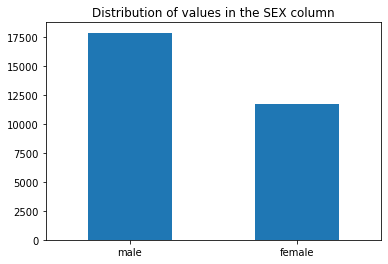

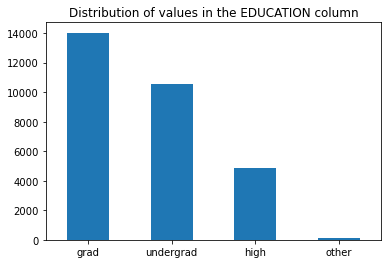

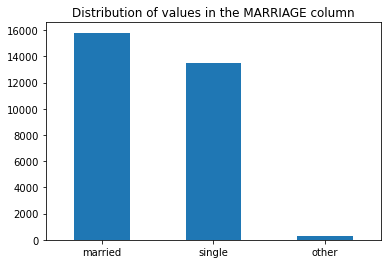

In [9]:
for i in cols[1:4]:

    data[f'{i}'].value_counts().plot(kind='bar', rot=0)
    
    if i == 'SEX':
        plt.xticks([0, 1], ['male', 'female'])
    elif i == 'EDUCATION':
        plt.xticks([0, 1, 2, 3], ['grad', 'undergrad', 'high', 'other'])
    else:
        plt.xticks([0, 1, 2], ['married', 'single', 'other'])
    
    title = f'Distribution of values in the {i} column'
    plt.title(title)
    plt.show()

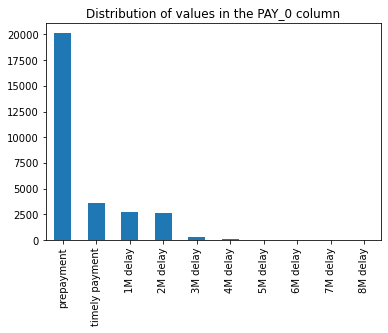

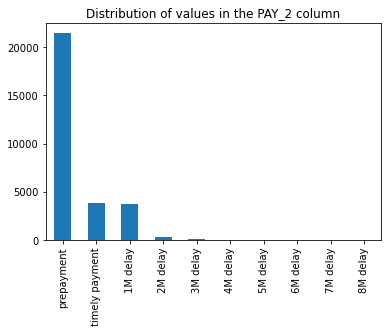

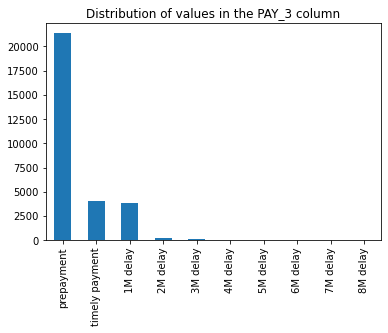

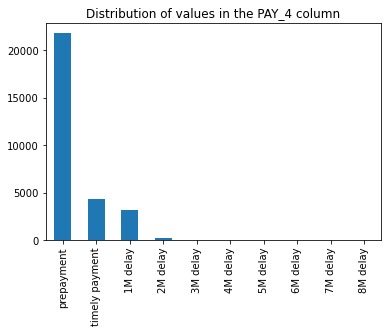

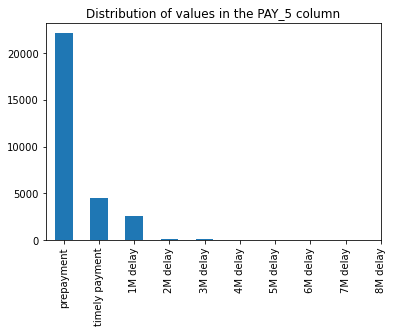

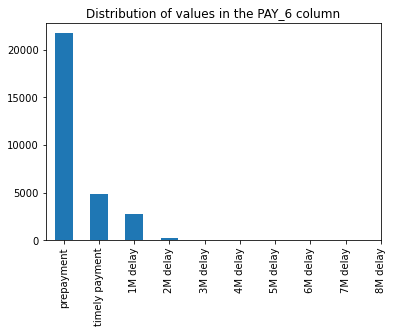

In [10]:
for i in cols[4:10]:

    data[f'{i}'].value_counts().plot(kind='bar', rot=0)
    plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 
               ['prepayment', 'timely payment', '1M delay', '2M delay', '3M delay', 
                '4M delay', '5M delay', '6M delay','7M delay', '8M delay'])
    plt.xticks(rotation=90)
    
    title = f'Distribution of values in the {i} column'
    plt.title(title)
    plt.show()

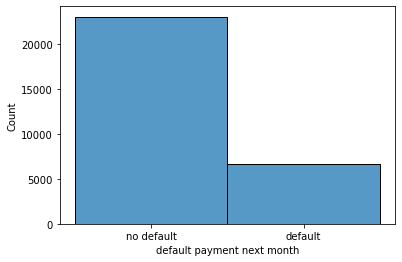

In [11]:
# Histrogram of y variable distribution

temp = data['default payment next month']
num_cat = len(pd.unique(temp))

sns.histplot(data=temp, bins=num_cat, discrete=True)
plt.xticks([0, num_cat-1], ['no default', 'default'])
title = f'Distribution of values in the {i} column'
plt.show()

Now let us proceed with numerical data. 

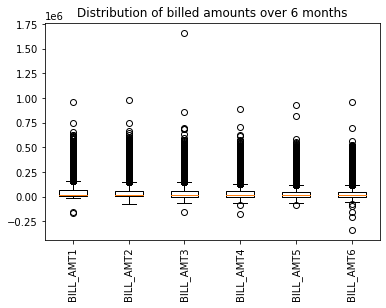

In [12]:
temp = data.iloc[:, 10:16]

plt.boxplot(temp)
plt.xticks(rotation=90)
plt.xticks(range(1, 7), ['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'])

plt.title('Distribution of billed amounts over 6 months')
plt.show()

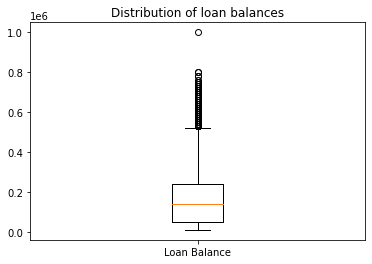

In [13]:
temp = data.iloc[:, 16]

plt.boxplot(temp)
plt.xticks([1], ['Loan Balance'])
plt.title('Distribution of loan balances')
plt.show()

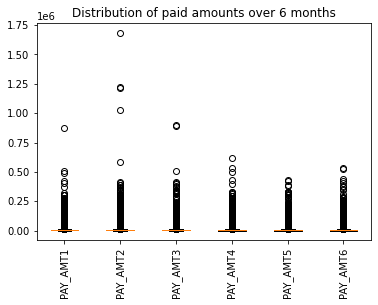

In [14]:
temp = data.iloc[:, 17:len(cols)-1]

plt.boxplot(temp)
plt.xticks(rotation=90)
plt.xticks(range(1, 7), ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'])
plt.title('Distribution of paid amounts over 6 months')
plt.show()

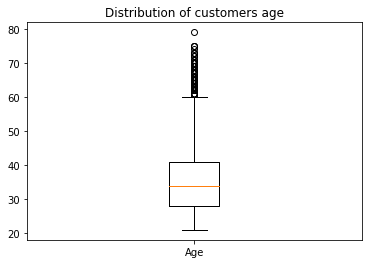

In [15]:
temp = data.iloc[:, len(cols)-1]

plt.boxplot(temp)
plt.xticks([1], ['Age'])
plt.title('Distribution of customers age')
plt.show()

With the help of box plots, we can see that there are clear outliers in many categories that will require treatment at a later stage. Now let us plot the distributions of all these varaibles. Also, some of the Bill_Amount variables have negative values which should not be the case because the amount that is due on a loan cannot be negative.

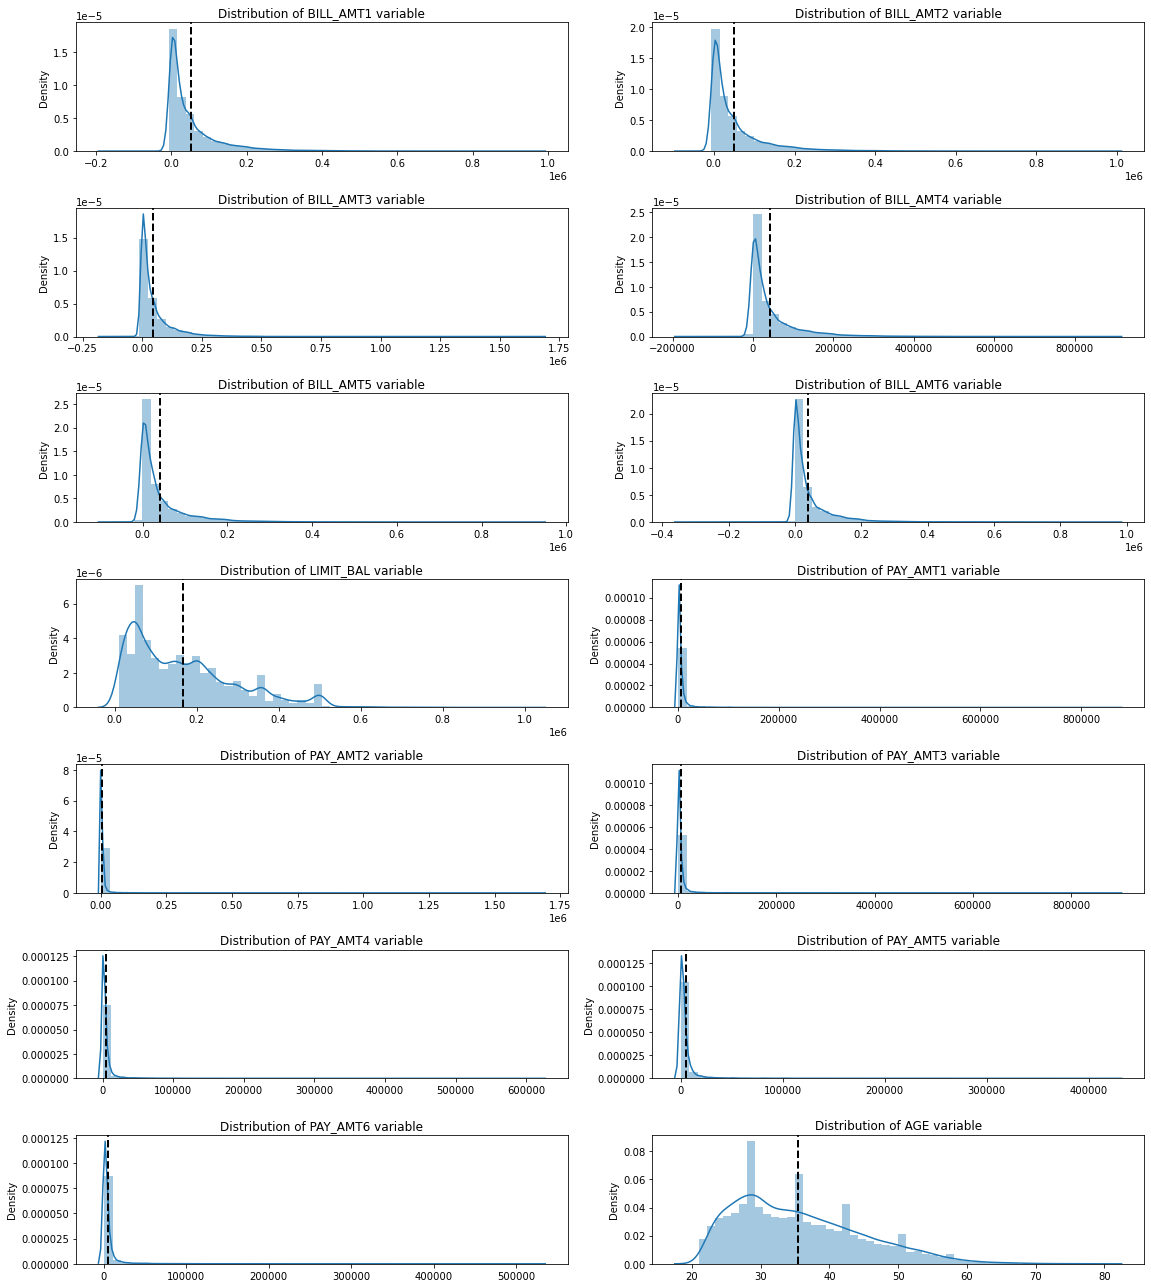

In [16]:
temp = data.iloc[:, 10:]
cols = list(temp.columns)

figure, axis = plt.subplots(int((len(cols))/2), 2, figsize=(16, 18))

count = 0
subcount = 0
for i in cols:
    
    title = f'Distribution of {i} variable'
    
    temp = data[f'{i}'].values
    sns.distplot(temp, ax = axis[count, subcount])
    axis[count, subcount].axvline(temp.mean(), color='k', linestyle='dashed', linewidth=2)
    axis[count, subcount].set_title(title)
    
    if subcount == 0:
        subcount = subcount + 1
    else:
        count = count + 1
        subcount = 0

figure.tight_layout()
plt.show()

We can see that the distributions of almost all of the variables are positively skewed and in general exhibit low kurtosis. This again proves that there are significant outliers in the right tail of these distributions.

### Bi-variate Analysis

First, let us check correlation between the continuous variables

In [17]:
temp = data.iloc[:, 10:]

corr = temp.corr()
corr.style.background_gradient(cmap='coolwarm')

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,LIMIT_BAL,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,AGE
BILL_AMT1,1.000000,0.951255,0.891886,0.861238,0.831406,0.804834,0.283695,0.140489,0.098947,0.156813,0.157643,0.165041,0.175798,0.054704
BILL_AMT2,0.951255,1.000000,0.927801,0.893418,0.861465,0.833846,0.276673,0.280903,0.100613,0.151052,0.146479,0.155457,0.170718,0.052385
BILL_AMT3,0.891886,0.927801,1.000000,0.925094,0.885669,0.855571,0.281738,0.244564,0.318039,0.131112,0.142468,0.177549,0.179539,0.051839
BILL_AMT4,0.861238,0.893418,0.925094,1.000000,0.940458,0.902348,0.293442,0.233241,0.208175,0.300270,0.129010,0.160036,0.175067,0.049839
BILL_AMT5,0.831406,0.861465,0.885669,0.940458,1.000000,0.947211,0.295316,0.218717,0.181988,0.252535,0.293204,0.140896,0.162081,0.048323
BILL_AMT6,0.804834,0.833846,0.855571,0.902348,0.947211,1.000000,0.289701,0.202036,0.173825,0.234608,0.250144,0.307504,0.115525,0.046712
LIMIT_BAL,0.283695,0.276673,0.281738,0.293442,0.295316,0.289701,1.000000,0.195666,0.177669,0.210523,0.203263,0.217251,0.219676,0.144214
PAY_AMT1,0.140489,0.280903,0.244564,0.233241,0.218717,0.202036,0.195666,1.000000,0.286741,0.253683,0.200094,0.149749,0.186283,0.025440
PAY_AMT2,0.098947,0.100613,0.318039,0.208175,0.181988,0.173825,0.177669,0.286741,1.000000,0.246086,0.179612,0.182296,0.157779,0.022402
PAY_AMT3,0.156813,0.151052,0.131112,0.300270,0.252535,0.234608,0.210523,0.253683,0.246086,1.000000,0.215711,0.160705,0.160548,0.029478


We can see that billing amounts in each of the 6 periods are highly correlated with each other, so using all 6 features in the model will result in multicollinearity problem. On the other hand, payment amounts are not highly correlated with each other as well as with billed amounts.

Now we can draw scatter plots to see if there are any multivariate outliers in the data.

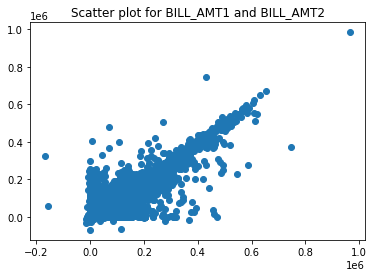

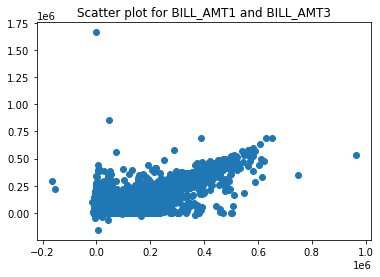

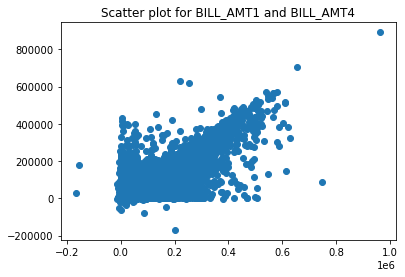

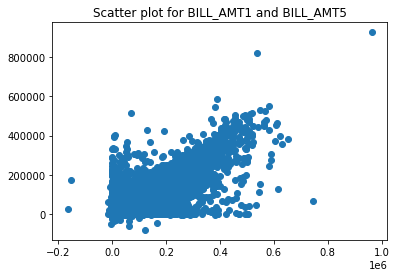

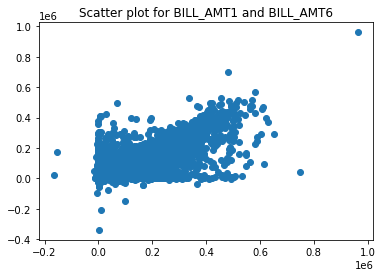

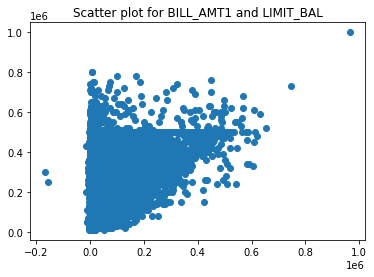

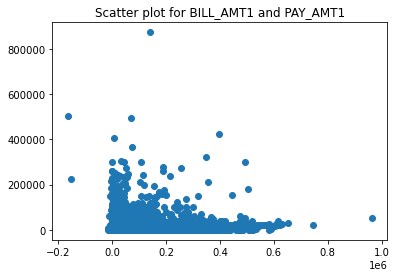

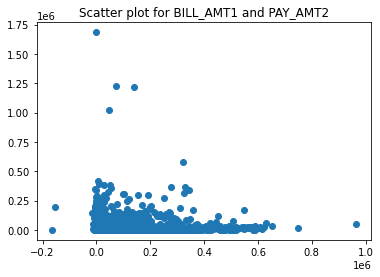

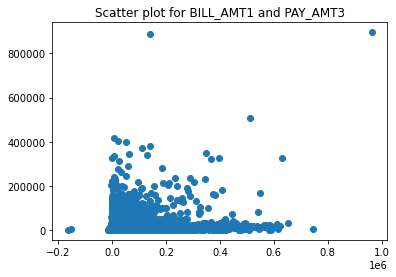

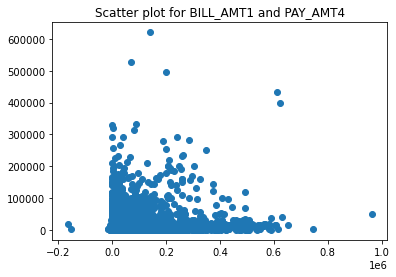

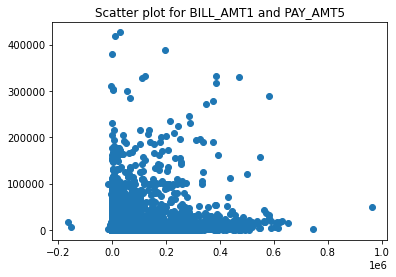

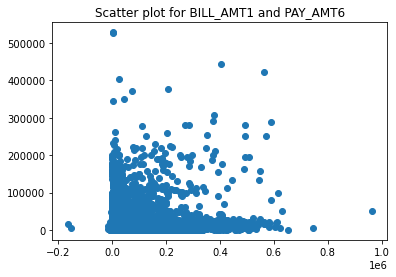

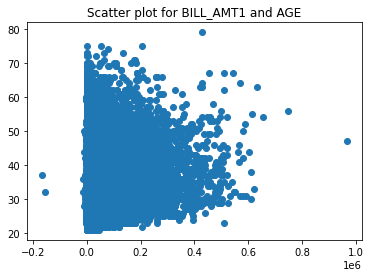

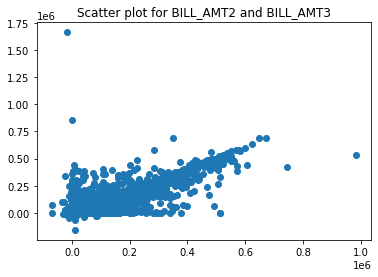

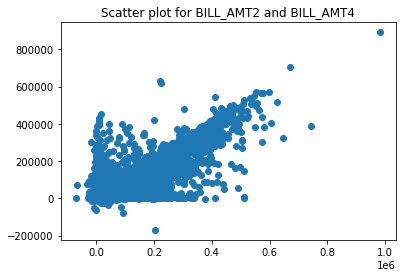

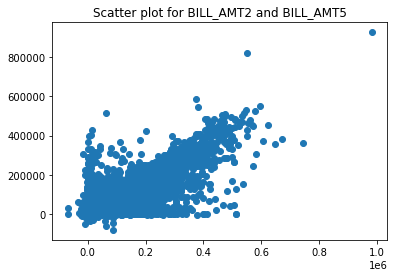

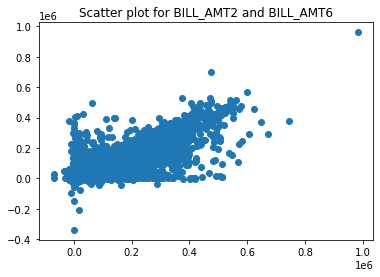

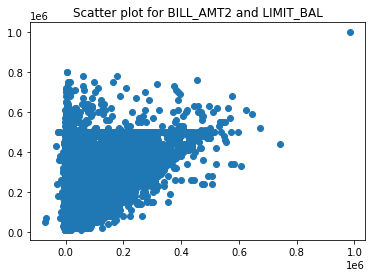

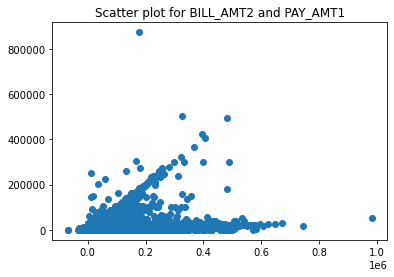

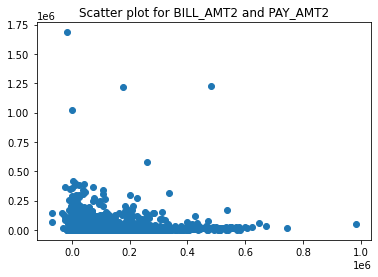

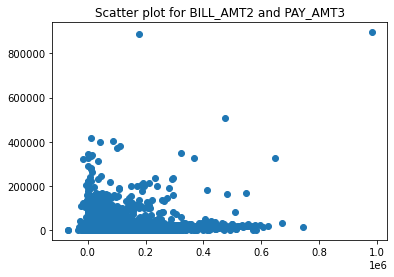

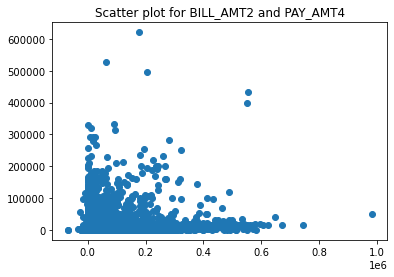

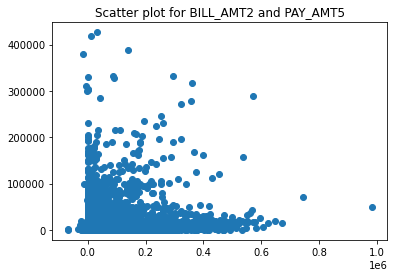

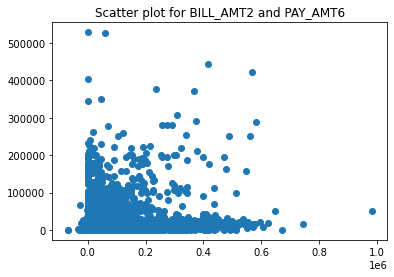

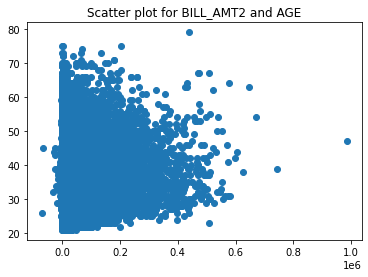

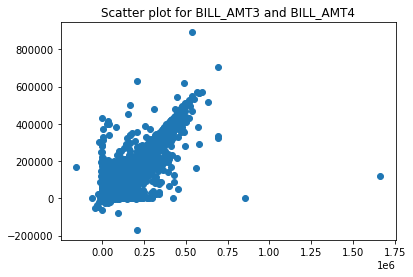

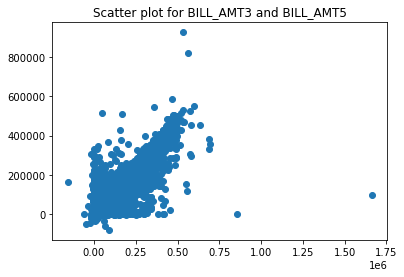

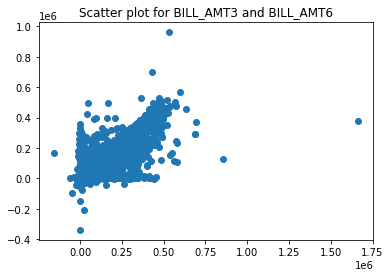

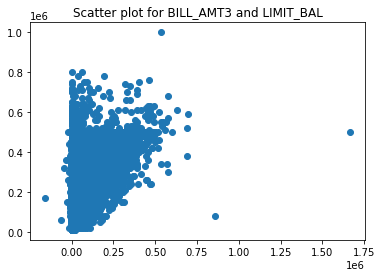

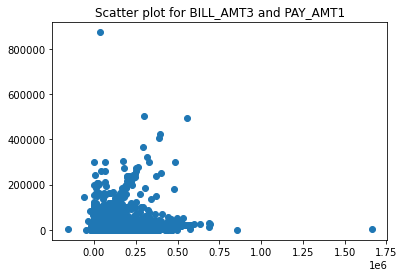

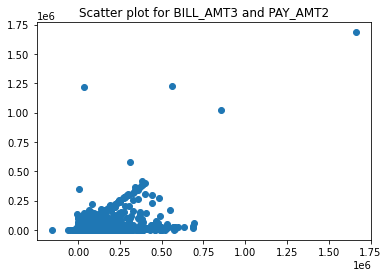

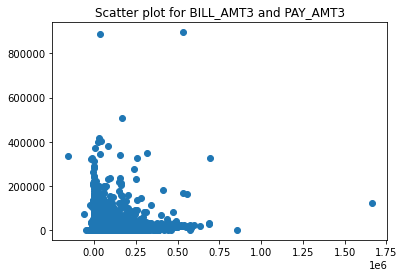

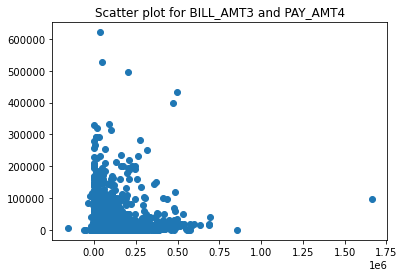

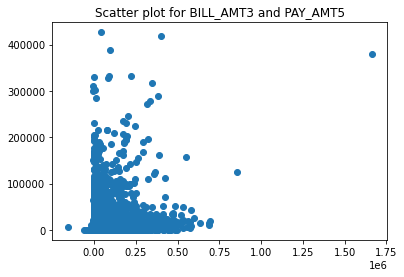

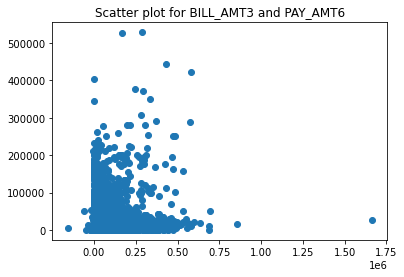

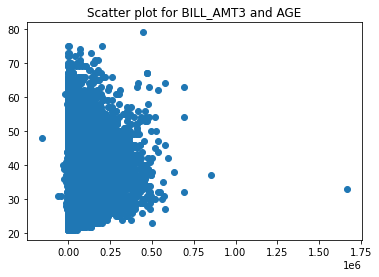

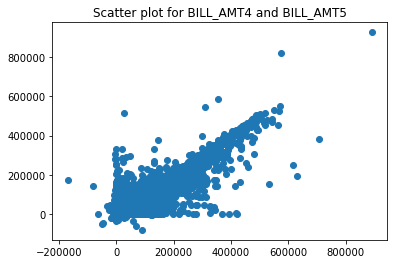

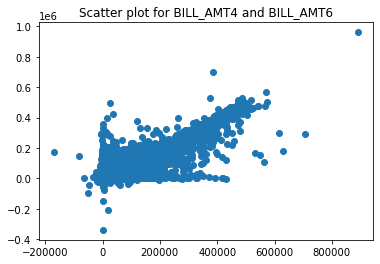

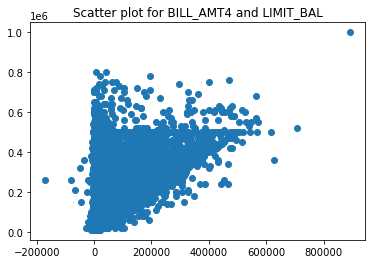

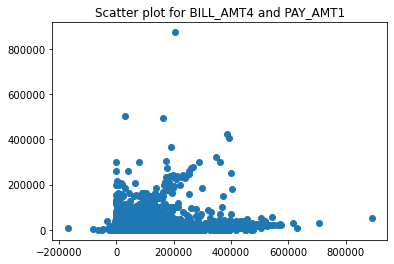

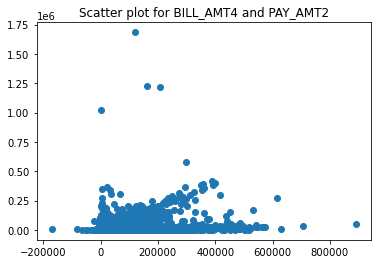

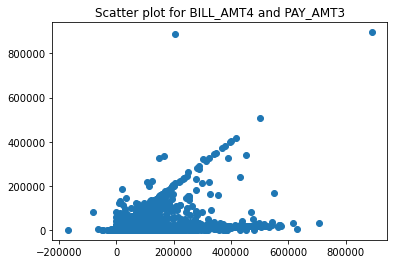

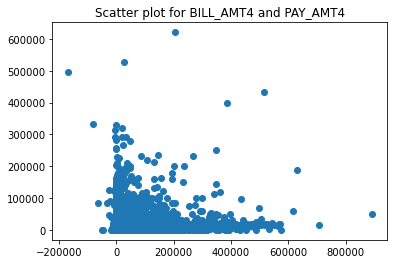

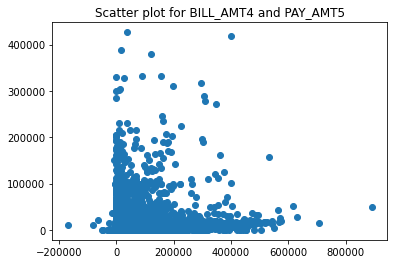

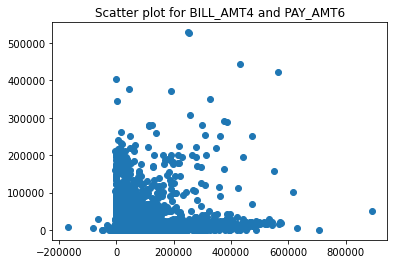

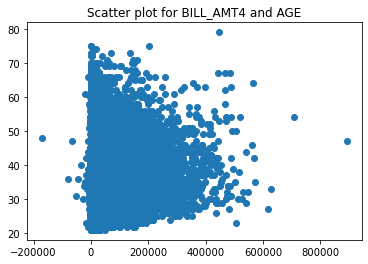

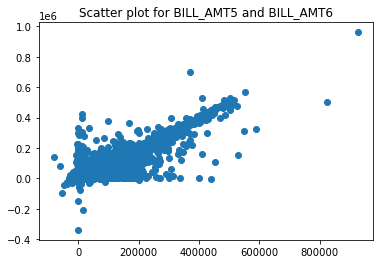

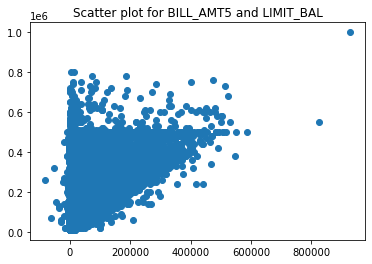

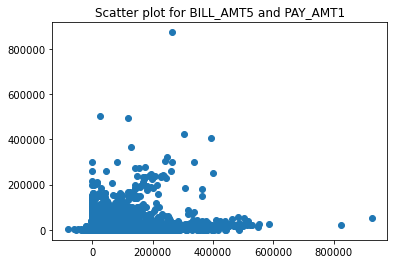

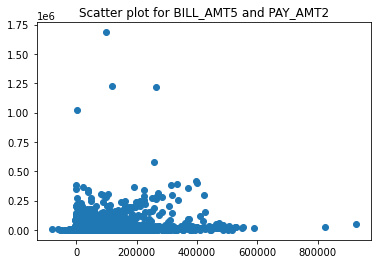

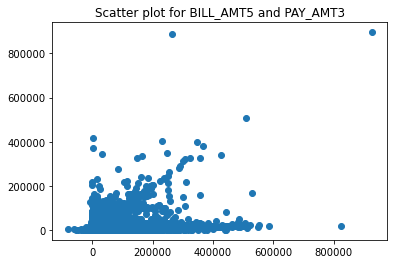

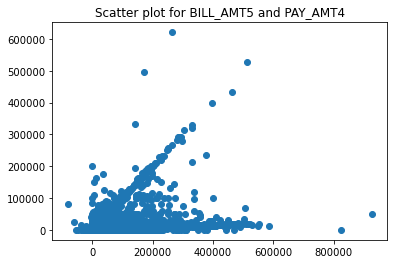

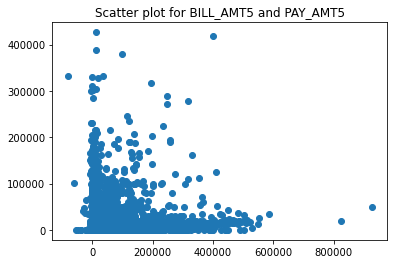

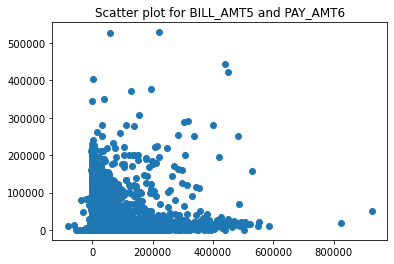

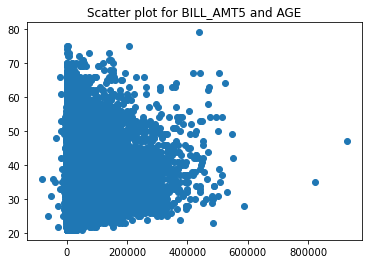

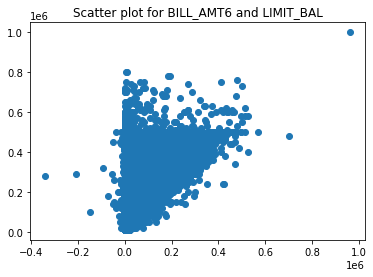

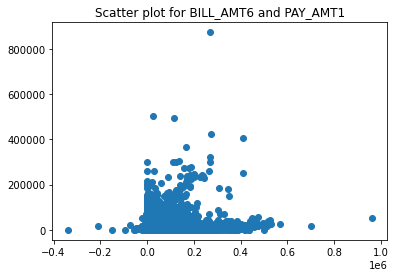

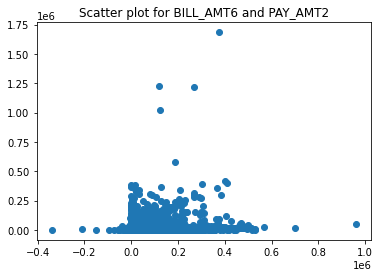

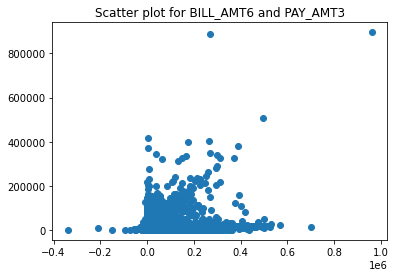

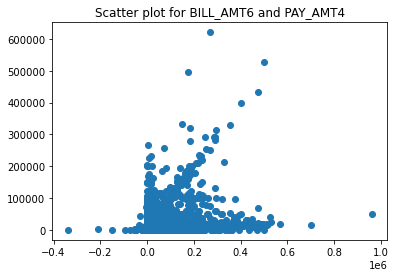

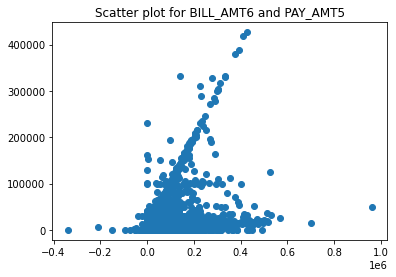

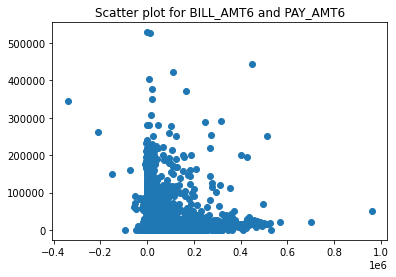

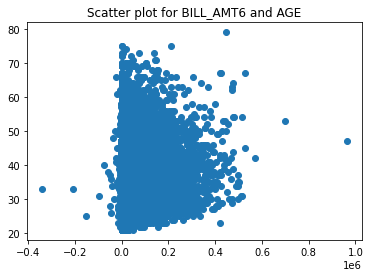

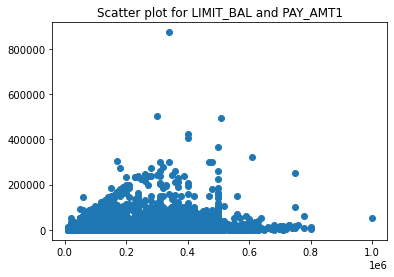

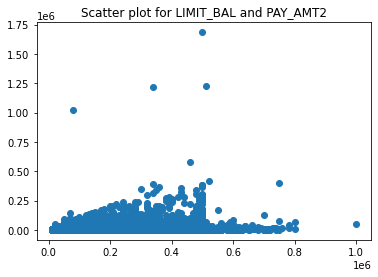

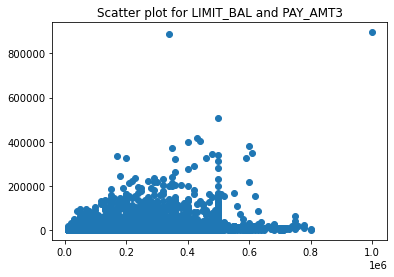

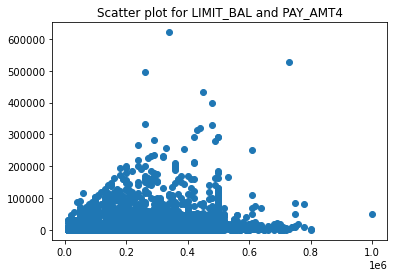

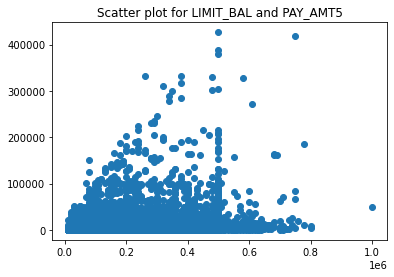

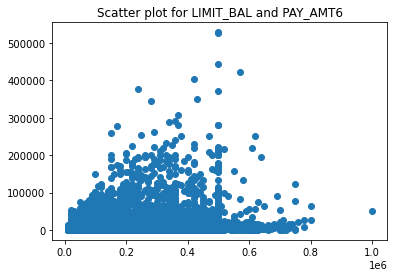

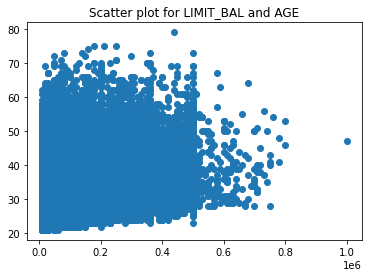

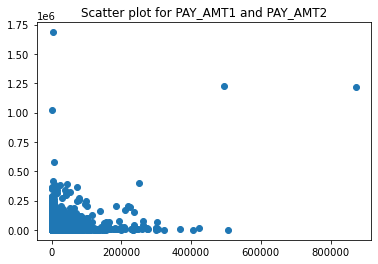

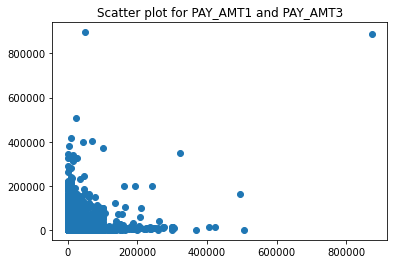

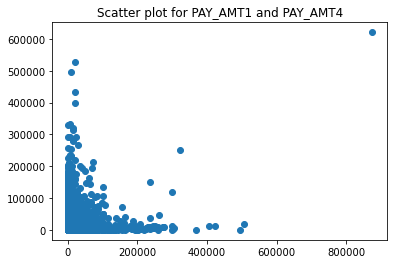

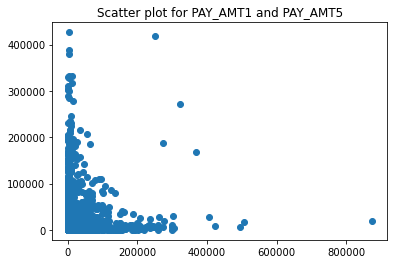

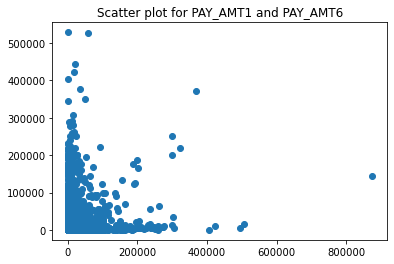

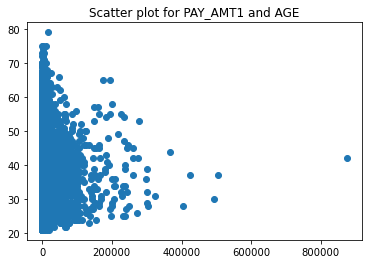

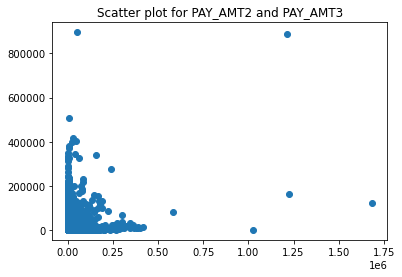

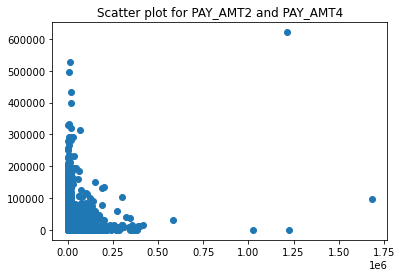

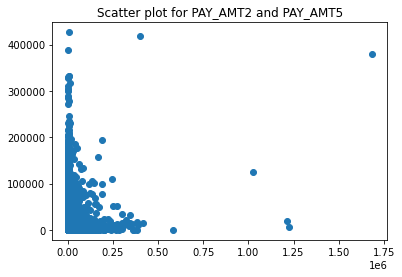

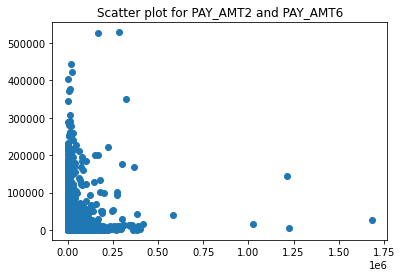

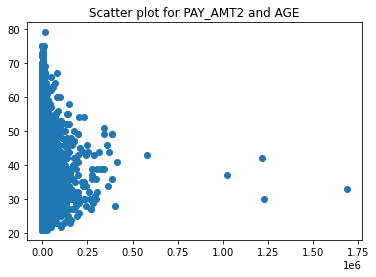

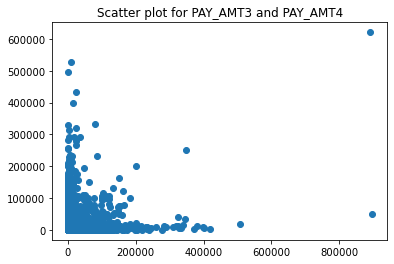

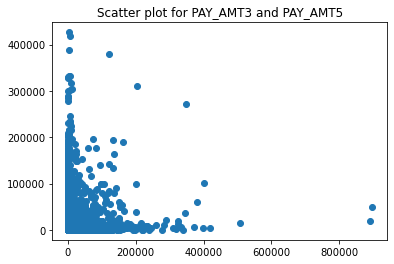

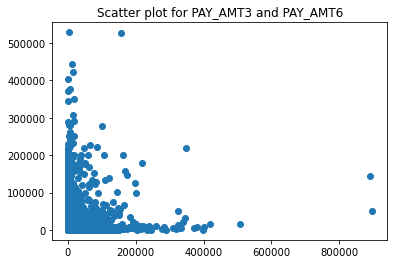

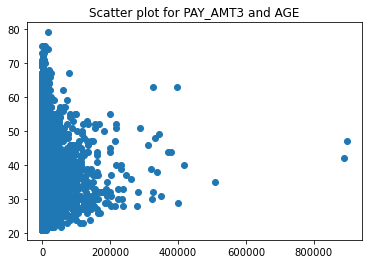

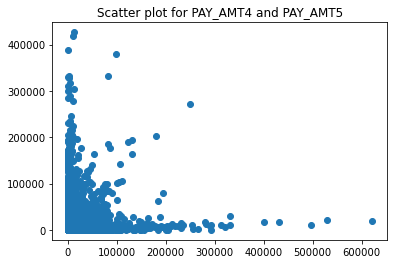

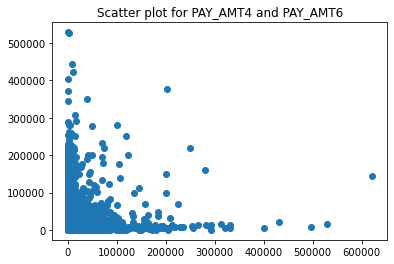

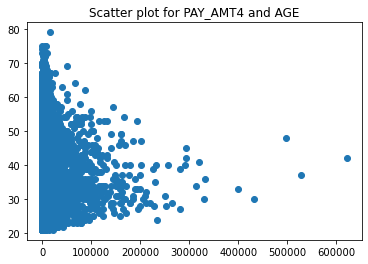

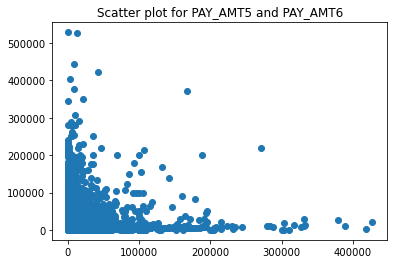

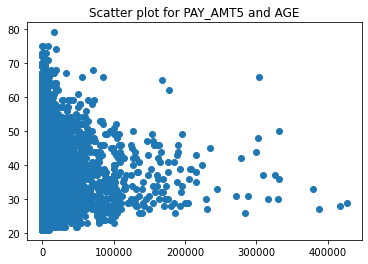

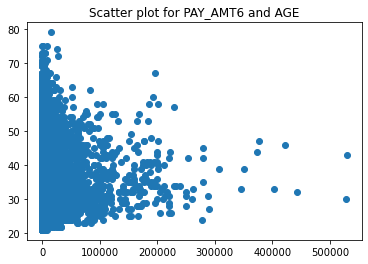

In [18]:
temp = data.iloc[:, 10:len(data.columns)]

for i in range(len(temp.columns)):
    if i != len(temp.columns)-1:
        for j in range(i+1, len(temp.columns)):
            plt.scatter(temp.iloc[:, i], temp.iloc[:, j])
            plt.title(f'Scatter plot for {temp.columns[i]} and {temp.columns[j]}')
            plt.show()

Based on these scatter plots, we can see that there are clear outliers in almost all of the pairs of continuous variables in the dataset.

Now let us analyse interrelations between categorical features. To do so, we construct two-way tables. 

In [19]:
df_cat = data.iloc[:, :10]
df_cat

,default payment next month,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,1,2,2,1,2,2,0,0,-1,-1
1,1,2,2,2,0,2,0,0,0,2
2,0,2,2,2,0,0,0,0,0,0
3,0,2,2,1,0,0,0,0,0,0
4,0,1,2,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
29995,0,1,3,1,0,0,0,0,0,0
29996,0,1,3,2,0,0,0,0,0,0
29997,1,1,2,2,4,3,2,0,0,0
29998,1,1,3,1,1,0,0,0,0,0


In [20]:
name_col = list(df_cat.columns)

for i in range(len(df_cat.columns)):
    if i != (len(df_cat.columns)-1):
        for j in range(i+1, len(df_cat.columns)):
            table_class = pd.crosstab(index=df_cat[f"{name_col[i]}"], 
                            columns=df_cat[f"{name_col[j]}"])

            table_class.columns = list(df_cat[f"{name_col[j]}"].unique())
            table_class.index= list(df_cat[f"{name_col[i]}"].unique())
            
            print(f'Two-way table for the columns {name_col[i]} and {name_col[j]}')
            print(table_class)  

Two-way table for the columns default payment next month and SEX
      2      1
1  8885  14111
0  2861   3744
Two-way table for the columns default payment next month and EDUCATION
      2      1     3    4
1  8545  10695  3640  116
0  2036   3329  1233    7
Two-way table for the columns default payment next month and MARRIAGE
       1      2    3
1  10285  12477  234
0   3192   3329   84
Two-way table for the columns default payment next month and PAY_0
      2      0    -1     1    3   4   8   7   5   6
1  2345  17311  2411   803   76  24  11   5   2   8
0   363   2821  1251  1837  244  52  13   6   7  11
Two-way table for the columns default payment next month and PAY_2
      2      0  -1     3    5   7   4   1   6   8
1  3033  18022  23  1724  125  47  10   3   8   1
0   689   3444   5  2180  201  50  15   9  12   0
Two-way table for the columns default payment next month and PAY_3
      0      2  -1     3    4   6   7   1   5   8
1  3272  17728   3  1838   99  32   9   9   5   1
0

Two-way table for the columns PAY_2 and PAY_6
      -1      2     0   3   6   4   7   8   5
 2  2851    824    43   4   0   0   0   0   0
 0  1725  18452  1234  41   6   3   5   0   0
-1     8     17     3   0   0   0   0   0   0
 3   209   2208  1296  95  33   6  11  45   1
 5     9    176   119  11   4   3   2   1   1
 7     4     35    44   9   5   0   0   0   0
 4     0     15     6   2   0   1   1   0   0
 1     0      0    11   1   0   0   0   0   0
 6     0      0     0  20   0   0   0   0   0
 8     0      0     0   0   1   0   0   0   0
Two-way table for the columns PAY_3 and PAY_4
       0     -1   2     3   4   5   7   6   1   8
 0  3597    428   0     2   0   0   0   0   0   0
 2   608  19860   0   886  22   4   1   0   0   0
-1     0      1   2     1   0   0   0   0   0   0
 3    82   1532   0  2052  78  19   7   1  31   0
 4     0      0   0   201  33   3   0   0   0   0
 6     0      0   0     0  47  26   2   0   0   1
 7     0      0   0     0   0  17   4   0   0   0
 1

Now we check correlation between ordinal variables using Spearman Rank Correlation. Ordinal variables are PAY_0 to PAY_6.

In [21]:
def spearm_rank(x, y):
    coef, p = spearmanr(x, y)
    alpha = 0.05
    if p > alpha:
         return ('Variables are uncorrelated (fail to reject H0) p=%.3f' % p)
    else:
         return ('Variables are correlated (reject H0) p=%.3f' % p)

In [22]:
for i in range(4, len(df_cat.columns)):
    if i != (len(df_cat.columns)-1):
        for j in range(i+1, len(df_cat.columns)):
            print(f'{name_col[i]} and {name_col[j]}:' + spearm_rank(df_cat[f"{name_col[i]}"], df_cat[f"{name_col[j]}"]))

PAY_0 and PAY_2:Variables are correlated (reject H0) p=0.000
PAY_0 and PAY_3:Variables are correlated (reject H0) p=0.000
PAY_0 and PAY_4:Variables are correlated (reject H0) p=0.000
PAY_0 and PAY_5:Variables are correlated (reject H0) p=0.000
PAY_0 and PAY_6:Variables are correlated (reject H0) p=0.000
PAY_2 and PAY_3:Variables are correlated (reject H0) p=0.000
PAY_2 and PAY_4:Variables are correlated (reject H0) p=0.000
PAY_2 and PAY_5:Variables are correlated (reject H0) p=0.000
PAY_2 and PAY_6:Variables are correlated (reject H0) p=0.000
PAY_3 and PAY_4:Variables are correlated (reject H0) p=0.000
PAY_3 and PAY_5:Variables are correlated (reject H0) p=0.000
PAY_3 and PAY_6:Variables are correlated (reject H0) p=0.000
PAY_4 and PAY_5:Variables are correlated (reject H0) p=0.000
PAY_4 and PAY_6:Variables are correlated (reject H0) p=0.000
PAY_5 and PAY_6:Variables are correlated (reject H0) p=0.000


As we can see, the amounts paid each month are all highly correlated with each other. This is not suprising since loans typically have a certain predetermined repayment schedule.

Now let us check the correlation between our nominal variables: Sex, Education, and Marriage. We check correlations between these variables with the Chi-Squared test.

In [23]:
def chi_test(x, y):
    contingency = pd.crosstab(x, y)
    test_res = stats.chi2_contingency(contingency)
    test_val = test_res[0]
    
    alpha=0.05
    p_val = test_res[1]
    
    if p_val > alpha:
        return ('Variables are uncorrelated (fail to reject H0) p=%.3f' % p_val), test_res[0]
    else: 
        return ('Variables are correlated (reject H0) p=%.3f' % p_val), test_res[0]

In [24]:
for i in range(1, 4):
    if i != 4:
        for j in range(i+1, 4):
            print(f'{name_col[i]} and {name_col[j]}:' + chi_test(df_cat[f"{name_col[i]}"], df_cat[f"{name_col[j]}"])[0])

SEX and EDUCATION:Variables are correlated (reject H0) p=0.000
SEX and MARRIAGE:Variables are correlated (reject H0) p=0.000
EDUCATION and MARRIAGE:Variables are correlated (reject H0) p=0.000


Again, we can see that the variables are correlated. 

### Treating Missing Values

In [25]:
data.isna().sum()

default payment next month    0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
LIMIT_BAL                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
AGE                           0
dtype: int64

We do not have any missing values, so we can proceed with treatment of outliers. As the box plots for the numerical features indicate, many of them clearly have outliers, and they must be dealt with before we can start building the models.

### Treating Outliers

First, let us see how many outliers there are in each column. We will consider outliers those observations that are out of range of 1st and 99th percentiles.

In [26]:
data_num = data.iloc[:, 10:]
name_col = list(data_num.columns)

In [27]:
for i in range(len(data_num.columns)):
    top_95 = data_num.iloc[:, i].quantile(0.99)
    bottom_5 = data_num.iloc[:, i].quantile(0.01)
    num_outliers = ((data_num.iloc[:, i]<(bottom_5))|(data_num.iloc[:, i]>(top_95))).sum()
    share_outliers = round(num_outliers/len(data_num.iloc[:, i])*100, 2)
    print(f'There are {num_outliers} in the {name_col[i]} column which is {share_outliers} percent of all observations')

There are 590 in the BILL_AMT1 column which is 1.99 percent of all observations
There are 567 in the BILL_AMT2 column which is 1.92 percent of all observations
There are 575 in the BILL_AMT3 column which is 1.94 percent of all observations
There are 591 in the BILL_AMT4 column which is 2.0 percent of all observations
There are 592 in the BILL_AMT5 column which is 2.0 percent of all observations
There are 592 in the BILL_AMT6 column which is 2.0 percent of all observations
There are 203 in the LIMIT_BAL column which is 0.69 percent of all observations
There are 296 in the PAY_AMT1 column which is 1.0 percent of all observations
There are 296 in the PAY_AMT2 column which is 1.0 percent of all observations
There are 296 in the PAY_AMT3 column which is 1.0 percent of all observations
There are 296 in the PAY_AMT4 column which is 1.0 percent of all observations
There are 296 in the PAY_AMT5 column which is 1.0 percent of all observations
There are 296 in the PAY_AMT6 column which is 1.0 per

Now we can delete the observations that contain outliers.

In [28]:
for i in range(len(data_num.columns)):
    top_95 = data[f'{name_col[i]}'].quantile(0.99)
    bottom_5 = data[f'{name_col[i]}'].quantile(0.01)
    data = data.loc[(data[f'{name_col[i]}']>=bottom_5)&(data[f'{name_col[i]}']<= top_95)]
data.reset_index(drop=True, inplace=True)
data

,default payment next month,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT5,BILL_AMT6,LIMIT_BAL,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,AGE
0,1,2,2,1,2,2,0,0,-1,-1,...,0,0,20000,0,689,0,0,0,0,24
1,1,2,2,2,0,2,0,0,0,2,...,3455,3261,120000,0,1000,1000,1000,0,2000,26
2,0,2,2,2,0,0,0,0,0,0,...,14948,15549,90000,1518,1500,1000,1000,1000,5000,34
3,0,2,2,1,0,0,0,0,0,0,...,28959,29547,50000,2000,2019,1200,1100,1069,1000,37
4,0,1,2,1,0,0,0,0,0,0,...,19146,19131,50000,2000,36681,10000,9000,689,679,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24347,1,1,2,2,2,2,2,2,2,2,...,82607,81158,80000,7000,3500,0,7000,0,4000,34
24348,0,1,3,1,0,0,0,0,0,0,...,31237,15980,220000,8500,20000,5003,3047,5000,1000,39
24349,0,1,3,2,0,0,0,0,0,0,...,5190,0,150000,1837,3526,8998,129,0,0,43
24350,1,1,2,2,4,3,2,0,0,0,...,20582,19357,30000,0,0,22000,4200,2000,3100,37


## LOGISTIC REGRESSION

Logistic regression has a number of assumptions, and one of them is that the X variables are not correlated with each other. As we have seen by means of the correlation matrix and scatter plots, this is not the case for many pairs of variables in the dataset. This is why before building the model we should choose what variables to include in it. We will keep those variables that are the most correlated with y variable.

First, let us select nominal variables for the model. They have a high degree of association with each other, so we will keep only one of them that is the most correlated with y variable.

In [29]:
name_col = data.columns
for i in range(1, 4):
    print(f'{name_col[0]} and {name_col[i]}:' + chi_test(data[f"{name_col[i]}"], data[f"{name_col[i]}"])[0])
    print(f'The test stat is: {chi_test(data[f"{name_col[i]}"], data[f"{name_col[0]}"])[1]}')

default payment next month and SEX:Variables are correlated (reject H0) p=0.000
The test stat is: 48.84426152931477
default payment next month and EDUCATION:Variables are correlated (reject H0) p=0.000
The test stat is: 90.70168463985732
default payment next month and MARRIAGE:Variables are correlated (reject H0) p=0.000
The test stat is: 27.2940715970788


Variable Education has the highest test statistic, so we will keep it in our model. Now let us choose one of the PAY_0 to PAY_6 variables. We will use rank biserial correlation because we have ordinal X's and nominal y.

In [30]:
for i in range(4, 10):
    p_val = binary_continuous((data['default payment next month']==1), data[f'{name_col[i]}'], 'rank_biserial')
    print(f'p-value for association test between {name_col[0]} and {name_col[i]} is: {p_val}')

p-value for association test between default payment next month and PAY_0 is: 6.372776883840256e-05
p-value for association test between default payment next month and PAY_2 is: 5.506651688449653e-05
p-value for association test between default payment next month and PAY_3 is: 4.8179971386250544e-05
p-value for association test between default payment next month and PAY_4 is: 4.45738790722669e-05
p-value for association test between default payment next month and PAY_5 is: 4.0882543924870455e-05
p-value for association test between default payment next month and PAY_6 is: 3.8674497847517066e-05


PAY_6 has the lowest p-value, so we will keep it in the model.

Finally, we should choose continuous variables. We will check correlation of all of these variables with y. To do so, we will use point biserial correlation, because X's are continuous, and y is nominal.

In [31]:
def point_bi(x, y):
    test_res = stats.pointbiserialr(x, y)
    p_val = test_res[1]
    alpha = 0.05
    
    if p_val > alpha:
        return ('Variables are uncorrelated (fail to reject H0) p=%.3f' % p_val)
    else: 
        return ('Variables are correlated (reject H0) p=%.3f' % p_val)

In [32]:
name_col = data.columns
for i in range(10, len(data.columns)):
    print(f'{name_col[0]} and {name_col[i]}:' + point_bi(data[f"{name_col[0]}"], data[f"{name_col[i]}"]))

default payment next month and BILL_AMT1:Variables are correlated (reject H0) p=0.000
default payment next month and BILL_AMT2:Variables are correlated (reject H0) p=0.000
default payment next month and BILL_AMT3:Variables are correlated (reject H0) p=0.001
default payment next month and BILL_AMT4:Variables are uncorrelated (fail to reject H0) p=0.053
default payment next month and BILL_AMT5:Variables are uncorrelated (fail to reject H0) p=0.273
default payment next month and BILL_AMT6:Variables are uncorrelated (fail to reject H0) p=0.707
default payment next month and LIMIT_BAL:Variables are correlated (reject H0) p=0.000
default payment next month and PAY_AMT1:Variables are correlated (reject H0) p=0.000
default payment next month and PAY_AMT2:Variables are correlated (reject H0) p=0.000
default payment next month and PAY_AMT3:Variables are correlated (reject H0) p=0.000
default payment next month and PAY_AMT4:Variables are correlated (reject H0) p=0.000
default payment next month a

As a result, our model will include the following variables:
- default payment next month as a y-variable
- Education, PAY_6, Loan_Amount, Bill_Amt1 and Pay_Amt1:Pay_Amt6

In [33]:
data_logit = data.drop(columns=['SEX', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 
                                 'PAY_4', 'PAY_5', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'])
data_logit

,default payment next month,EDUCATION,PAY_6,BILL_AMT1,LIMIT_BAL,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,2,-1,3913,20000,0,689,0,0,0,0
1,1,2,2,2682,120000,0,1000,1000,1000,0,2000
2,0,2,0,29239,90000,1518,1500,1000,1000,1000,5000
3,0,2,0,46990,50000,2000,2019,1200,1100,1069,1000
4,0,2,0,8617,50000,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...
24347,1,2,2,72557,80000,7000,3500,0,7000,0,4000
24348,0,3,0,188948,220000,8500,20000,5003,3047,5000,1000
24349,0,3,0,1683,150000,1837,3526,8998,129,0,0
24350,1,2,0,3565,30000,0,0,22000,4200,2000,3100


Variables EDUCATION and PAY_6 are not numerical, so we cannot use them as they are. We need to transform them into dummy variables first. 

In [34]:
dummy_var_ed = pd.get_dummies(data_logit['EDUCATION'])
dummy_var_pay = pd.get_dummies(data_logit['PAY_6'])

data_logit = data_logit.merge(dummy_var_ed, how='left', left_index=True, right_index=True)
data_logit = data_logit.merge(dummy_var_pay, how='left', left_index=True, right_index=True)
data_logit.drop(columns=['EDUCATION', 'PAY_6'], inplace=True)
data_logit.rename(columns={1:'Edu_Grad', '2_x':'Edu_Bach', '3_x':'Edu_High', '4_x':'Edu_Other', -1:'PAY6_Prep', 
                             0:'PAY6_Timely', '2_y':'PAY6_2M', '3_y':'PAY6_3M', '4_y':'PAY6_4M', 5:'PAY6_5M', 6:'PAY6_6M', 
                             7:'PAY6_7M', 8:'PAY6_8M'}, inplace=True)

data_logit.drop(columns=['Edu_Grad', 'PAY6_Prep'], inplace=True)
data_logit

,default payment next month,BILL_AMT1,LIMIT_BAL,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Edu_Bach,Edu_High,Edu_Other,PAY6_Timely,PAY6_2M,PAY6_3M,PAY6_4M,PAY6_5M,PAY6_6M,PAY6_7M,PAY6_8M
0,1,3913,20000,0,689,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,2682,120000,0,1000,1000,1000,0,2000,1,0,0,0,1,0,0,0,0,0,0
2,0,29239,90000,1518,1500,1000,1000,1000,5000,1,0,0,1,0,0,0,0,0,0,0
3,0,46990,50000,2000,2019,1200,1100,1069,1000,1,0,0,1,0,0,0,0,0,0,0
4,0,8617,50000,2000,36681,10000,9000,689,679,1,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24347,1,72557,80000,7000,3500,0,7000,0,4000,1,0,0,0,1,0,0,0,0,0,0
24348,0,188948,220000,8500,20000,5003,3047,5000,1000,0,1,0,1,0,0,0,0,0,0,0
24349,0,1683,150000,1837,3526,8998,129,0,0,0,1,0,1,0,0,0,0,0,0,0
24350,1,3565,30000,0,0,22000,4200,2000,3100,1,0,0,1,0,0,0,0,0,0,0


Now, we split the data into training and testing sets with a 80/20 split. Then, we fit the Logit model. 

In [35]:
y = data_logit['default payment next month']
X = data_logit.iloc[:, 1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
logit = sm.Logit(y_train, sm.add_constant(X_train)) ## Could have used scikit-learn package too
logit_res = logit.fit()

print(logit_res.summary())

         Current function value: 0.499877
         Iterations: 35
                               Logit Regression Results                               
Dep. Variable:     default payment next month   No. Observations:                19481
Model:                                  Logit   Df Residuals:                    19461
Method:                                   MLE   Df Model:                           19
Date:                        Mon, 22 May 2023   Pseudo R-squ.:                 0.08453
Time:                                21:26:52   Log-Likelihood:                -9738.1
converged:                              False   LL-Null:                       -10637.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.7799      0.063    -12.396      0.000      -0.903      -0.65

We can see that a number of coefficients are statistically insignificant at 5% confidence level. We will apply backward elimination technique to reduce the number of features that we are using. At each iteration, we will get rid of the x variable with the highest p-value, until all remaining coefficients are statistically significant at 5% confidence level. 

In [37]:
p_values = logit_res.pvalues
highest_pval = max(p_values)

data_logit_upd = data_logit

while highest_pval > 0.05:

    index = p_values[p_values==highest_pval].index.values.astype(str)
    data_logit_upd.drop(columns=[f'{index[0]}'], inplace=True)
    
    y = data_logit_upd['default payment next month']
    X = data_logit_upd.iloc[:, 1:]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    logit = sm.Logit(y_train, sm.add_constant(X_train))
    logit_res_upd = logit.fit()
    
    p_values = logit_res_upd.pvalues
    highest_pval = max(p_values)
    
logit_res_upd.summary()

Optimization terminated successfully.
         Current function value: 0.497818
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.502477
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.499320
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.498267
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.501756
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.500417
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.500601
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.500429
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                               
======================================================================================
Dep. Variable:     default payment next month   No. Observations:                19481
Model:                                  Logit   Df Residuals:                    19469
Method:                                   MLE   Df Model:                           11
Date:                        Mon, 22 May 2023   Pseudo R-squ.:                 0.08553
Time:                                21:26:52   Log-Likelihood:                -9748.9
converged:                               True   LL-Null:                       -10661.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7419      0.034    -21.880      0.000      -0.808      -0.675
BILL_AMT1   1.215e-06   4.53e-07      2.680      0.007    3.26e-07     2.1e-06
LIMIT_BAL  -2.087e-06   1.83e-07    -11.436      0.000   -2.44e-06   -1.73e-06
PAY_AMT1   -3.994e-05   5.55e-06     -7.196      0.000   -5.08e-05   -2.91e-05
PAY_AMT2   -4.312e-05   5.78e-06     -7.463      0.000   -5.44e-05   -3.18e-05
PAY_AMT3   -3.035e-05    5.4e-06     -5.618      0.000   -4.09e-05   -1.98e-05
PAY_AMT4   -3.284e-05   5.59e-06     -5.872      0.000   -4.38e-05   -2.19e-05
PAY6_2M        1.3388      0.050     26.682      0.000       1.240       1.437
PAY6_3M        1.7693      0.185      9.587      0.000       1.408       2.131
PAY6_4M        1.5294      0.357      4.279      0.000       0.829       2.230
PAY6_6M        2.4734      0.660      3.748      0.000       1.180       3.767
PAY6_7M        2.5191      0.415      6.069      0.000       1.706       3.333
==============================================================================
"""

The results above are the final results of the logit model estimation. Let us test the predictive ability of the model with our test data set. 

In [38]:
parameters = logit_res_upd.params

y = data_logit_upd['default payment next month']
X = data_logit_upd.iloc[:, 1:]
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

x_test = sm.add_constant(X_test)
y_test = y_test

y_pred = round(logit_res_upd.predict(x_test))

y_pred.astype(int)
y_test.astype(int)

20287    0
18504    1
19417    0
14213    1
4271     0
        ..
13574    0
751      0
12457    1
19042    0
1245     0
Name: default payment next month, Length: 4871, dtype: int64

In [39]:
pred_accuracy = accuracy_score(y_test, y_pred)
print('Classification accuracy of the Logit model is ' + str(round(pred_accuracy, 4)))

Classification accuracy of the Logit model is 0.7822


In [40]:
f1_score = metrics.f1_score(y_test, y_pred)
print('F1 score of the Logit model is ' + str(round(f1_score, 4)))

F1 score of the Logit model is 0.2846


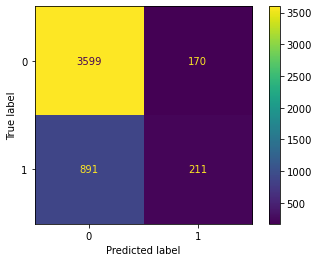

In [41]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

## K-NEAREST NEIGBOR

For ML algorithms, we will use the same set of X variables as for the Logit model. However, we still need to do some data preparation work first. For example, since KNN is a distance-based algorithm, continous features should be scaled so that none of them has an overexaggerated influence on the calculated distance values that ultimately influence the prediction. 

In [42]:
data_knn = data_logit
cols = data_knn.columns

for i in cols:
    data_knn[f'{i}'] = (data_knn[f'{i}'] - data_knn[f'{i}'].min())/(data_knn[f'{i}'].max() - data_knn[f'{i}'].min())

For ML algorithms, we will split data into 3 parts: train (60%), validation (20%), and test (20%). We will use validation set to tune hyperparameters for the models using grid search.

In [43]:
X = data_knn.iloc[:, 1:]
y = data_knn.iloc[:, 0]

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2)

X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.2)

First, we identify the set of optimal parameters using grid search.

In [44]:
knn_class = KNeighborsClassifier()
parameters = {
        'n_neighbors':[5, 10, 15],
        "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],
        "leaf_size":[15, 30, 45, 60]
    }
cv = GridSearchCV(knn_class, parameters, cv=4)
cv.fit(X_valid, y_valid)
cv.best_params_

{'algorithm': 'auto', 'leaf_size': 60, 'n_neighbors': 15}

In [45]:
best_algo = cv.best_params_['algorithm']
best_leaf = cv.best_params_['leaf_size']
best_neighbors = cv.best_params_['n_neighbors']

In [46]:
knn_class = KNeighborsClassifier(n_neighbors=best_neighbors, algorithm=best_algo, leaf_size=best_leaf)
knn_class.fit(X_train, y_train)
y_pred = knn_class.predict(X_test)

In [47]:
pred_accuracy = accuracy_score(y_test, y_pred)
print('Classification accuracy of the KNN model is ' + str(round(pred_accuracy, 4)))

Classification accuracy of the KNN model is 0.7789


In [48]:
f1_score = metrics.f1_score(y_test, y_pred)
print('F1 score of the KNN model is ' + str(round(f1_score, 4)))

F1 score of the KNN model is 0.3109


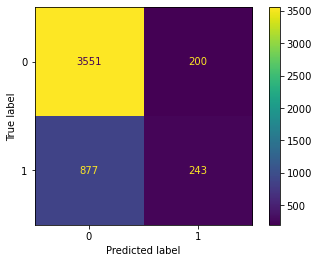

In [49]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

## RANDOM FOREST

Ranadon Forest is not a distance-based algorithm, and for this algorithm we should use unscaled data. This is why we will use the same dataset as we used for the logistic regression without any adjustments. We have a classification problem, so we will use Random Forest Classifier.

In [50]:
data_rf = data_logit

X = data_rf.iloc[:, 1:]
y = data_rf.iloc[:, 0]

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2)

X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.2)

In [51]:
rf_class = RandomForestClassifier()
parameters = {
        'n_estimators':[25, 50, 75, 100],
        'criterion':['gini', 'entropy', 'log_loss'],
        'max_depth':[10, 20, 30, 40]
    }
cv = GridSearchCV(rf_class, parameters, cv=4)
cv.fit(X_valid, y_valid)
cv.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 75}

In [52]:
best_crit = cv.best_params_['criterion']
best_depth = cv.best_params_['max_depth']
best_estimators = cv.best_params_['n_estimators']

In [53]:
rf_class = RandomForestClassifier(n_estimators=best_estimators, criterion=best_crit, max_depth=best_depth)
rf_class.fit(X_train, y_train)
y_pred = rf_class.predict(X_test)

In [54]:
pred_accuracy = accuracy_score(y_test, y_pred)
print('Classification accuracy of the Random Forest model is ' + str(round(pred_accuracy, 4)))

Classification accuracy of the Random Forest model is 0.7779


In [55]:
f1_score = metrics.f1_score(y_test, y_pred)
print('F1 score of the Random Forest model is ' + str(round(f1_score, 4)))

F1 score of the Random Forest model is 0.2579


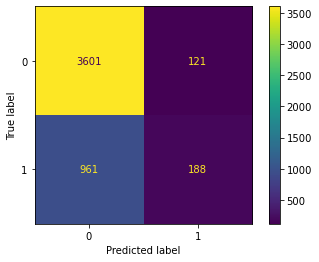

In [56]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

## GRADIENT-BOOSTED TREES

In [57]:
gbc_class = GradientBoostingClassifier()
parameters = {
    'loss':['log_loss', 'deviance', 'exponential'],
    'n_estimators':[25, 50, 75, 100],
    'max_depth':[10, 20, 30, 40],
    'learning_rate':[0.01, 0.1, 1]
}
cv = GridSearchCV(gbc_class, parameters, cv=4)
cv.fit(X_valid, y_valid)
cv.best_params_

{'learning_rate': 0.01,
 'loss': 'exponential',
 'max_depth': 10,
 'n_estimators': 75}

In [58]:
best_loss = cv.best_params_['loss']
best_rate = cv.best_params_['learning_rate']
best_depth = cv.best_params_['max_depth']
best_estimators = cv.best_params_['n_estimators']

In [59]:
gbc_class = GradientBoostingClassifier(loss = best_loss, learning_rate=best_rate, n_estimators=best_estimators, max_depth=best_depth)
gbc_class.fit(X_train, y_train)
y_pred = gbc_class.predict(X_test)

In [60]:
pred_accuracy = accuracy_score(y_test, y_pred)
print('Classification accuracy of the GBT model is ' + str(round(pred_accuracy, 4)))

Classification accuracy of the GBT model is 0.7672


In [61]:
f1_score = metrics.f1_score(y_test, y_pred)
print('F1 score of the GBT model is ' + str(round(f1_score, 4)))

F1 score of the GBT model is 0.0471


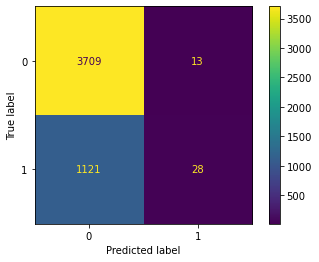

In [62]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

## CONCLUSION

As a result of the analysis, we see that all of the techniques that were used in this project resulted in approximately the same classification accuracy, with the logistic regression having the highest classification accuracy of 78%. Among ML algorithms, the best performer in terms of classification accuarcy is KNN with 77.9% accuracy. 

In terms of F1 score, the best model is KNN with 0.31 value of F1 score. Overall, KNN seems to be the best fit for the problem at hand because while it has a slightly lower predicting accuracy compared to the logistic model, it has a significanly better F1 score. 

Speking about F1 score, we can see that all models have quite low values of F1 score. All the models, while correcly predicting non-default in the majority of cases, struggle with correctly predicting defaults. One of the possible explanations for this can be the fact that this data set is imbalanced, that is, the number of non-defaults in the training set is much larger than the number of defaults. Thus, one of the potential improvements to the project is to make a balanced data set through over-sampling (by increasing the number of defaults in the final data set) or under-sampling (by reducing the number of non-defaults in the final data set). 